# Proyek Analisis Data: Bike sharing
- **Nama:** Cindy Fadillah
- **Email:** cindyfadillah1874@gmail.com
- **ID Dicoding:** cindy_fadillah_3d9R

## Menentukan Pertanyaan Bisnis

- Pada hari apa penyewaan sepeda yang paling banyak dan paling sedikit di hari kerja?
- Apa pengaruh musim terhadap jumlah sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [21]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Info dari DataFrame

In [4]:
print('DataFrame day:')
print(day_df.info())

DataFrame day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [5]:
print('DataFrame hour:')
print(hour_df.info())

DataFrame hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Cek Missing Value pada DataFrame

In [6]:
print('Missing Value DataFrame Day:')
print(day_df.isna().sum())

Missing Value DataFrame Day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
print('Missing Value DataFrame Hour:')
print(hour_df.isna().sum())

Missing Value DataFrame Hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Diketahui dari kedua data tersebut tidak ditemukan Missing Value

Cek Duplikasi pada DataFrame

In [8]:
print('DataFrame day:', day_df.duplicated().sum())
print("DataFrame hour:", hour_df.duplicated().sum())

DataFrame day: 0
DataFrame hour: 0


Diketahui dari kedua data tersebut tidak ditemukan Duplicated

Deskripsi Data

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengubah Tipe Data

In [11]:
# day_df
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# hour_df
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Cek Tipe Data kedua dataset

In [12]:
print('day_df "dteday" : ', day_df["dteday"].dtypes)
print('hour_df "dteday" : ', hour_df["dteday"].dtypes)

day_df "dteday" :  datetime64[ns]
hour_df "dteday" :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore ...

Plot Korelasi Variabel Numerik

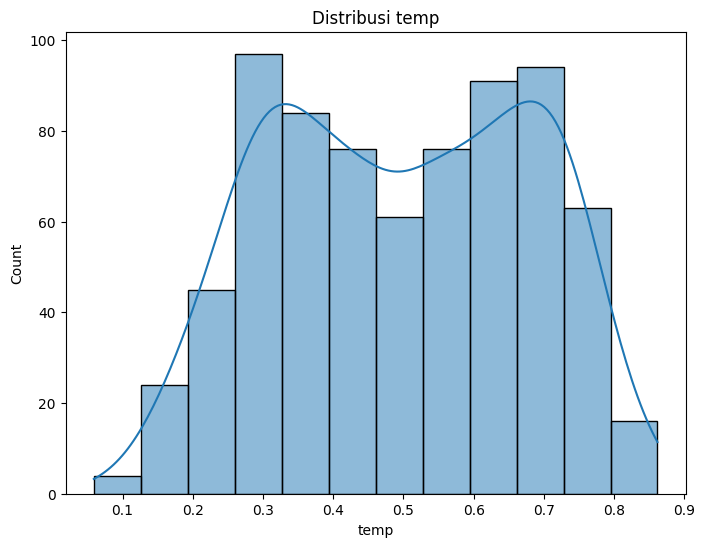

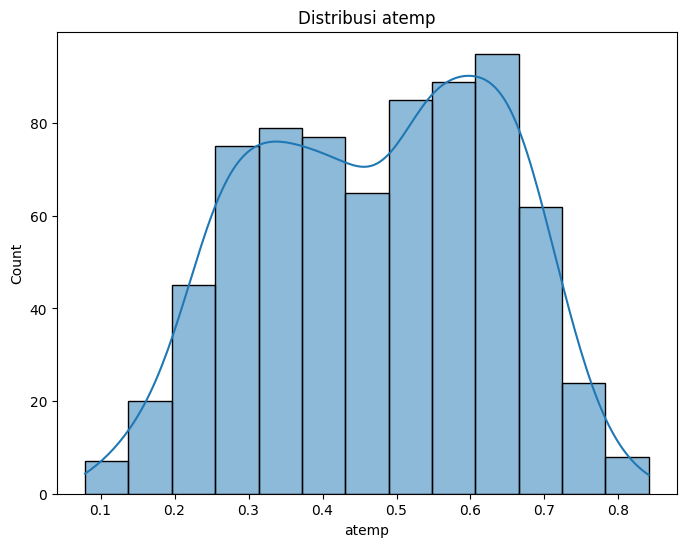

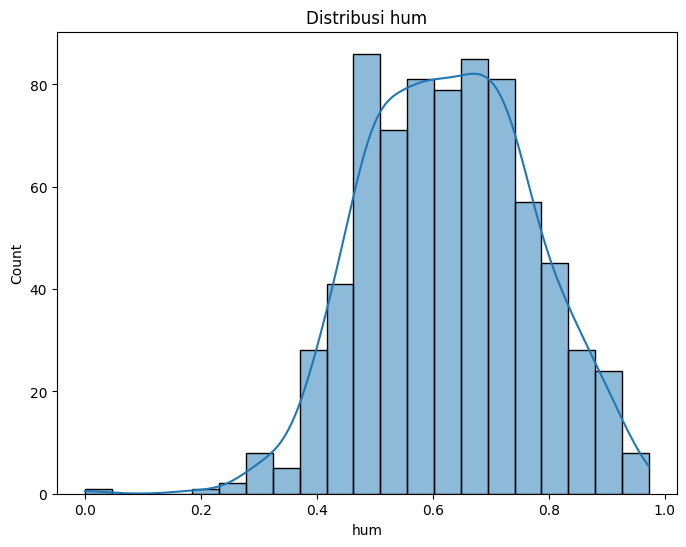

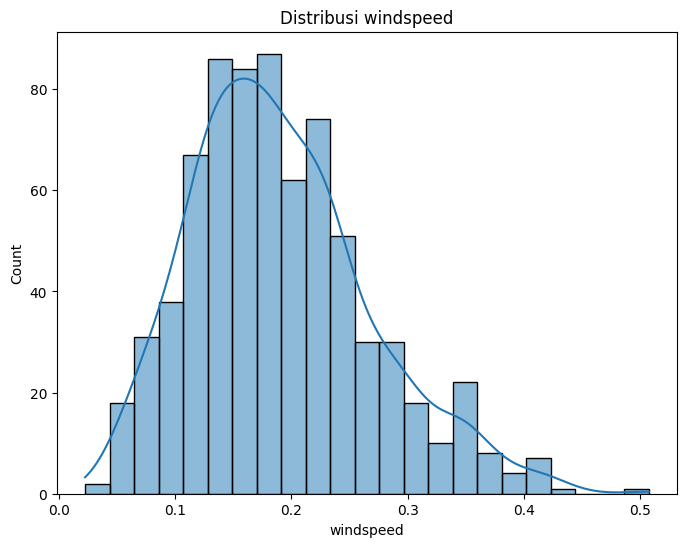

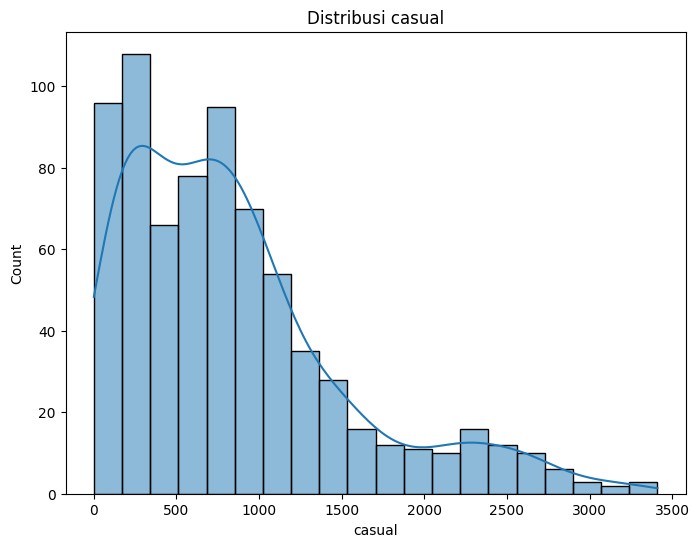

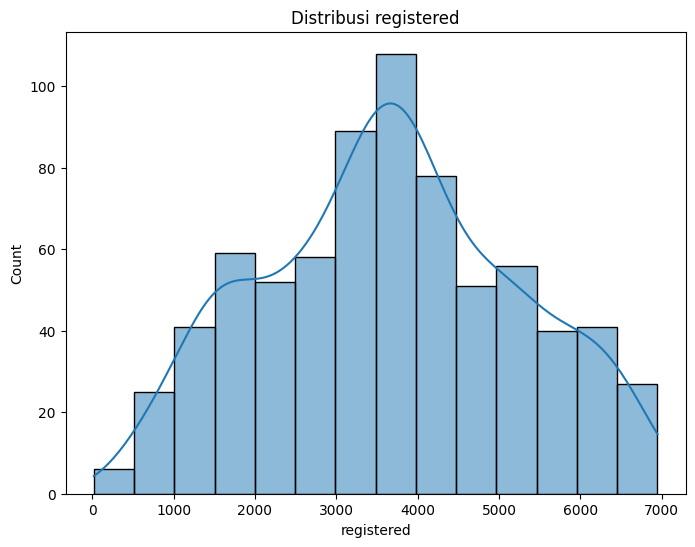

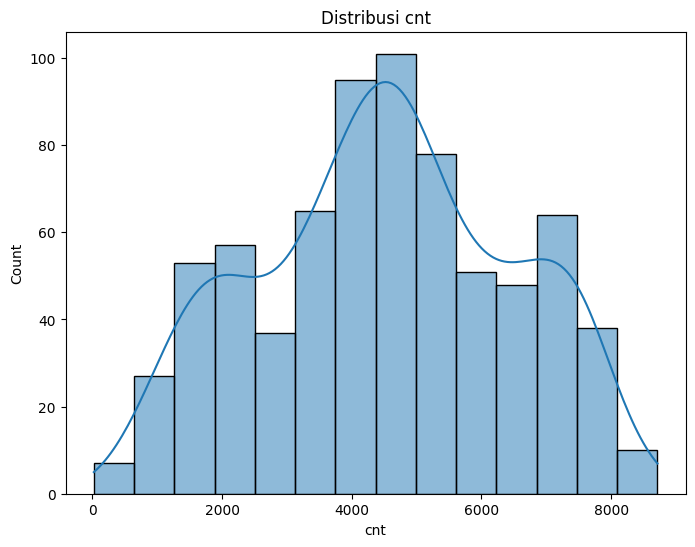

In [ ]:
var_numerik = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in var_numerik:
    plt.figure(figsize=(8, 6))
    sns.histplot(day_df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

Hubungan Musim dan jumlah sewa

In [ ]:
fig = px.box(day_df, x='season', y='cnt', color='season', title='Hubungan Musim dan jumlah sewa')
fig.show()

Hubungan Musim dan Jumlah Sewa berdasarkan Hari kerja

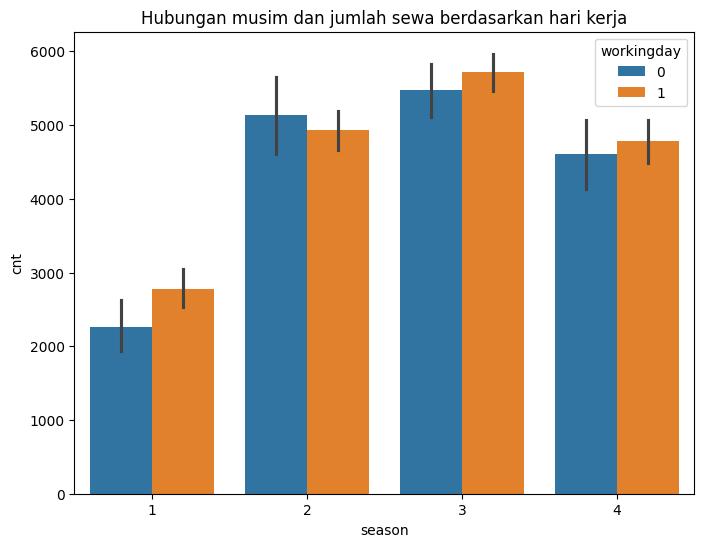

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=day_df, hue='workingday')
plt.title('Hubungan musim dan jumlah sewa berdasarkan hari kerja')
plt.show()

Hubungan Hari libur dan Jumlah sewa

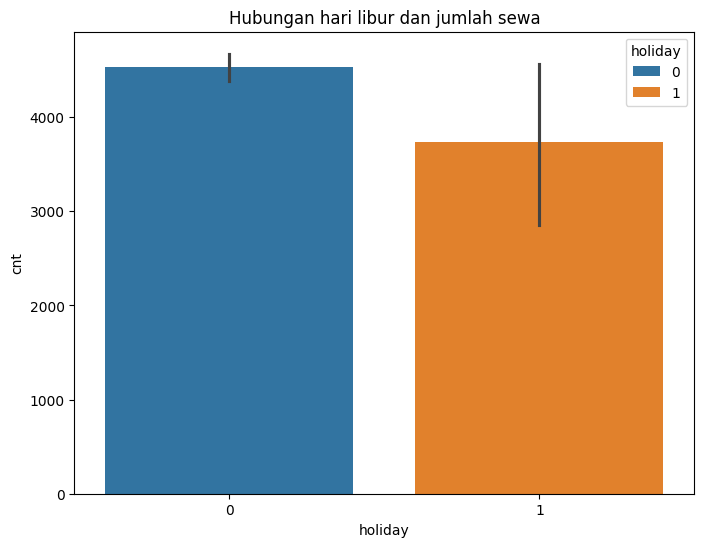

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot( data=day_df, x='holiday', y='cnt', hue="holiday")
plt.title('Hubungan hari libur dan jumlah sewa')
plt.show()

Hubungan cuaca dan jumlah sewa

In [ ]:
fig = px.box(day_df, x='weathersit', y='cnt', color='weathersit', title='Hubungan cuaca dan jumlah sewa')
fig.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa penyewaan sepeda yang paling banyak dan palin sedikit di hari kerja?



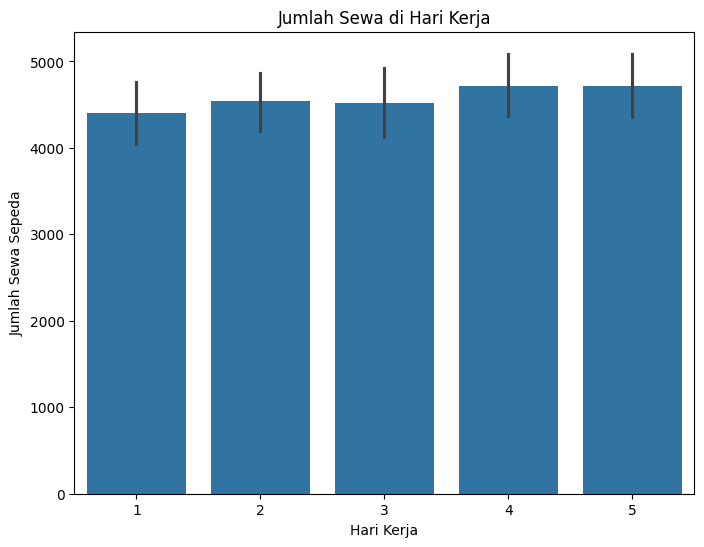

In [ ]:
# Mengambil data hari kerja
filtered_data_wDay = day_df[day_df["workingday"] == 1]

# Membuat plot bar
plt.figure(figsize=(8, 6))
sns.barplot(x="weekday", y="cnt", data=filtered_data_wDay)
plt.title("Jumlah Sewa di Hari Kerja")
plt.xlabel("Hari Kerja")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()


Pada hasil visualisasi di atas terlihat jika jumlah sewa sepeda paling banyak adalah hari 4, sedangkan yang paling sedikit adalah hari 1.

### Pertanyaan 2: Apa pengaruh musim terhadap jumlah sewa sepeda

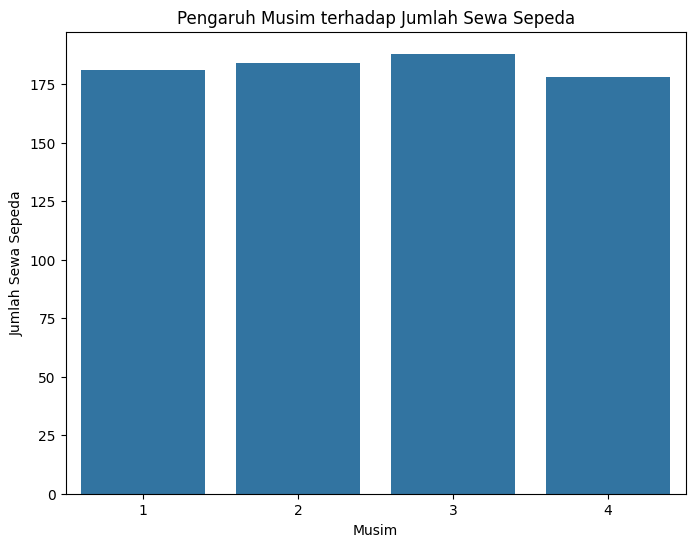

In [ ]:
# Menghitung total sewa untuk setiap musim
season_counts = day_df.groupby("season").size()

# Membuat plot bar
plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts)
plt.title("Pengaruh Musim terhadap Jumlah Sewa Sepeda")
plt.xlabel("Musim")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Pada hasil visualisasi di atas, terlihat jika musim tidak banyak berpengaruh terhadap jumlah sepeda yang disewa

## Conclusion

## - Conclution pertanyaan 1

Berdasarkan data yang tersedia, puncak sewa terjadi pada hari ke-4, hal ini menunjukkan minat pelanggan menggunakan sepeda pada hari tersebut. Sedangkan jumlah sewa sepeda paling sedikit terjadi pada hari ke-1, menunjukkan minat yang lebih rendah pada awal periode.

Pola penggunaan sepeda: Terjadi peningkatan penggunaan sepeda dari hari ke-1 hingga ke-4.

Kemungkinan faktor yang memengaruhi:

Tipe pengguna:
- Pengguna kasual: Mungkin lebih aktif di hari-hari tertentu, seperti akhir pekan atau hari libur.
- Pengguna komuter: Mungkin menggunakan sepeda pada hari kerja

Faktor eksternal:
- Cuaca: Cuaca yang baik dapat meningkatkan minat untuk bersepeda.
- Acara khusus: Acara di area tertentu dapat memengaruhi penggunaan sepeda.

Saran:
- Melakukan analisis lebih lanjut:
Mengidentifikasi tipe pengguna yang dominan pada setiap hari, menganalisis pengaruh faktor eksternal, seperti cuaca dan acara khusus.
- Membuat strategi berdasarkan hasil analisis: Meningkatkan penggunaan sepeda pada hari-hari dengan jumlah sewa yang rendah, menarik pengguna baru dengan menawarkan promo atau program khusus.

## Conclution pertanyaan 2

Berdasarkan data yang tersedia, dapat disimpulkan bahwa musim tidak memiliki pengaruh signifikan terhadap jumlah sepeda yang disewa. Hal ini menunjukkan bahwa minat pengguna sepeda relatif stabil.

Pola Penggunaan Sepeda:
- Stabil: Tidak ada perubahan signifikan dalam jumlah sewa di berbagai musim.
Faktor yang Mungkin Berpengaruh:

Saran untuk Meningkatkan Penggunaan Sepeda:
- Melakukan analisis lebih lanjut untuk: Mengidentifikasi faktor lain yang memengaruhi tren sewa, memahami preferensi pengguna di berbagai musim.
- Membuat strategi berdasarkan hasil analisis untuk: Menawarkan harga sewa yang kompetitif, memastikan ketersediaan dan aksesibilitas sepeda yang optimal, meluncurkan program promosi dan pemasaran yang efektif.